# Summary

>  As nouns the difference between default and fraud is that default is (finance) the condition of failing to meet an obligation while fraud is any act of deception carried out for the purpose of unfair, undeserved and/or unlawful gain. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import warnings
warnings.filterwarnings("ignore")


C:\Users\rafae\AppData\Roaming\Python\Python38\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:ylabel='Time'>

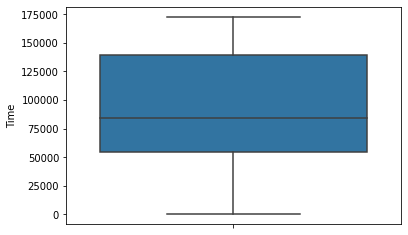

In [5]:
sns.boxplot(y=df['Time'])

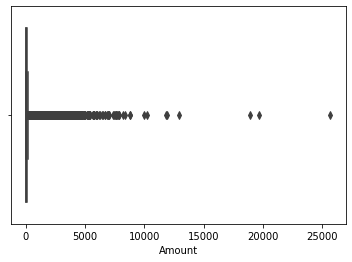

In [6]:
sns.boxplot(x=df['Amount']); #has outliers

In [7]:
print(round(df['Class'].value_counts()[0]/ len(df)*100,2))
print(round(df['Class'].value_counts()[1]/ len(df)*100,2))

99.83
0.17


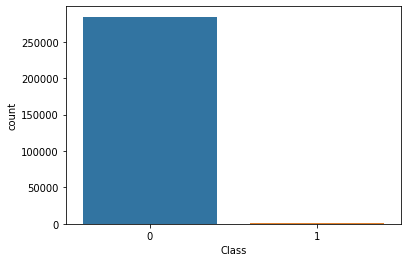

In [8]:
sns.countplot(data=df, x='Class'); #heavely skewed

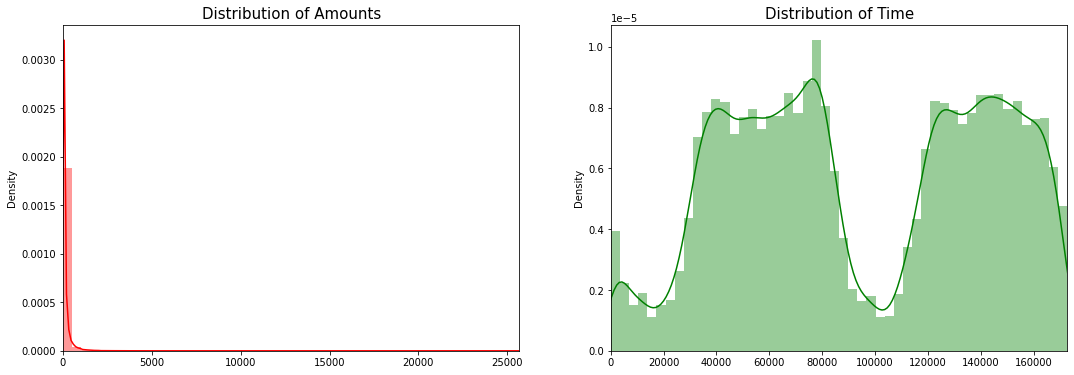

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

amount_values = df['Amount'].values
time_values = df['Time'].values

sns.distplot(amount_values, ax=ax[0], color='r')
ax[0].set_xlim([min(amount_values), max(amount_values)])
ax[0].set_title('Distribution of Amounts', fontsize= 15)

sns.distplot(time_values, ax=ax[1], color='g')
ax[1].set_xlim([min(time_values), max(time_values)])
ax[1].set_title('Distribution of Time', fontsize= 15)



plt.show()

# ***Scalling Data***

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [11]:
#using RobustScaler to scale de time and amount columns

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount','Time'], axis=1, inplace=True)

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [13]:
# putting scaled amount and time in the beginning (optional)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount','scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_time', scaled_time)
df.insert(1, 'scaled_amount', scaled_amount)

df

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-0.296653,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,1.034963,0.038986,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.034975,0.641096,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,1.034975,-0.167680,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


# ***Spliting dataset from training***

doing the split in this phase, makes better prediction with all dataset and avoid overfitting or underfitting data sets created instead using the functions.

We will make a subdataset with class balanced 50/50

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('Class',axis=1)
y = df['Class']

sss = StratifiedShuffleSplit(n_splits=5, random_state=None)

for train_index, test_index in sss.split(X, y):
    print("Train", train_index, "Test", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
    
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)


print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train [165734 112844 239210 ... 235911 147708  32821] Test [113333 217366 164868 ...  26918  27880 153020]
Train [ 41677  89016 205990 ... 197916   8937 243131] Test [182774 111116 248210 ... 129172  11569 198603]
Train [277016  92242  73482 ... 172002 256324  35680] Test [ 59598  61712 277851 ... 187022  25249   6975]
Train [157540 110246 217596 ... 142475 223503  75037] Test [ 89787  40653 257009 ...  33345 272336  33755]
Train [ 88164 124200 252873 ... 139546  84234 257657] Test [215821 165594 155128 ... 227608   6331 159995]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827173 0.00172827]
[0.99827955 0.00172045]


# Performing Random Undersampling 
* We balance dataset getting 50/50 distribution over our class for better fitting our model. 
* The risk of performing this technique involve shrink our non-defaulters from 284,315 register to 492 equaling the class but can loss some accuracy in our model, because information loss. 

In [15]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

norm_dist_df = pd.concat([fraud_df, non_fraud_df])

new_df = norm_dist_df.sample(frac=1, random_state=42)

new_df

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
189726,0.515079,1.402920,2.007782,-1.225094,-3.003519,-1.952254,1.947514,3.008964,-0.617804,0.619456,...,0.259711,0.114363,-0.084961,0.158094,0.706233,-0.068418,-0.305467,-0.049341,-0.049650,0
18466,-0.648104,-0.297911,1.102804,2.829168,-3.932870,4.707691,2.937967,-1.800904,1.672734,-0.300240,...,-0.030880,-0.106994,-0.250050,-0.521627,-0.448950,1.291646,0.516327,0.009146,0.153318,1
246707,0.805942,-0.296793,2.153089,0.051836,-2.210611,0.244200,0.736747,-1.015651,0.615790,-0.416723,...,-0.240310,0.066304,0.344531,-0.025860,0.542782,0.421014,0.698026,-0.121434,-0.082374,0
222419,0.684559,-0.307413,0.457845,1.373769,-0.488926,2.805351,1.777386,0.100492,1.295016,-0.135857,...,-0.264705,0.105593,0.371014,0.051105,0.401524,-0.724766,-0.202881,0.092124,0.094956,1
254344,0.845792,2.307133,-0.129778,0.141547,-0.894702,-0.457662,0.810608,-0.504723,1.373588,-0.209476,...,0.399447,-0.032643,-0.246526,0.484108,0.359637,-0.435972,-0.248480,0.021527,0.109192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163149,0.364184,-0.069028,-1.550273,1.088689,-2.393388,1.008733,-1.087562,-1.104602,-2.670503,0.147655,...,0.327490,0.802316,1.037105,0.095815,-0.320191,-0.080731,0.091012,0.024928,-0.077820,1
93486,-0.237890,-0.307413,1.079524,0.872988,-0.303850,2.755369,0.301688,-0.350284,-0.042848,0.246625,...,-0.252115,-0.023255,-0.158601,-0.038806,-0.060327,0.358339,0.076984,0.018936,0.060574,1
64422,-0.394178,-0.293440,-1.175576,0.612820,1.630943,0.042547,0.753301,1.082984,0.104011,0.519501,...,-0.209684,-0.045919,0.233867,-0.065428,-0.598083,-0.428763,0.326755,0.172320,0.138658,0
203700,0.590186,-0.307413,1.204934,3.238070,-6.010324,5.720847,1.548400,-2.321064,-0.781880,0.076619,...,0.338161,0.098341,-0.845866,-0.031228,0.421146,0.388361,0.056035,0.491828,0.340847,1


In [16]:
print(new_df['Class'].value_counts()/len(new_df))


sns.countplot('Class', data=new_df);

0    0.5
1    0.5
Name: Class, dtype: float64


TypeError: countplot() got multiple values for argument 'data'

<AxesSubplot:>

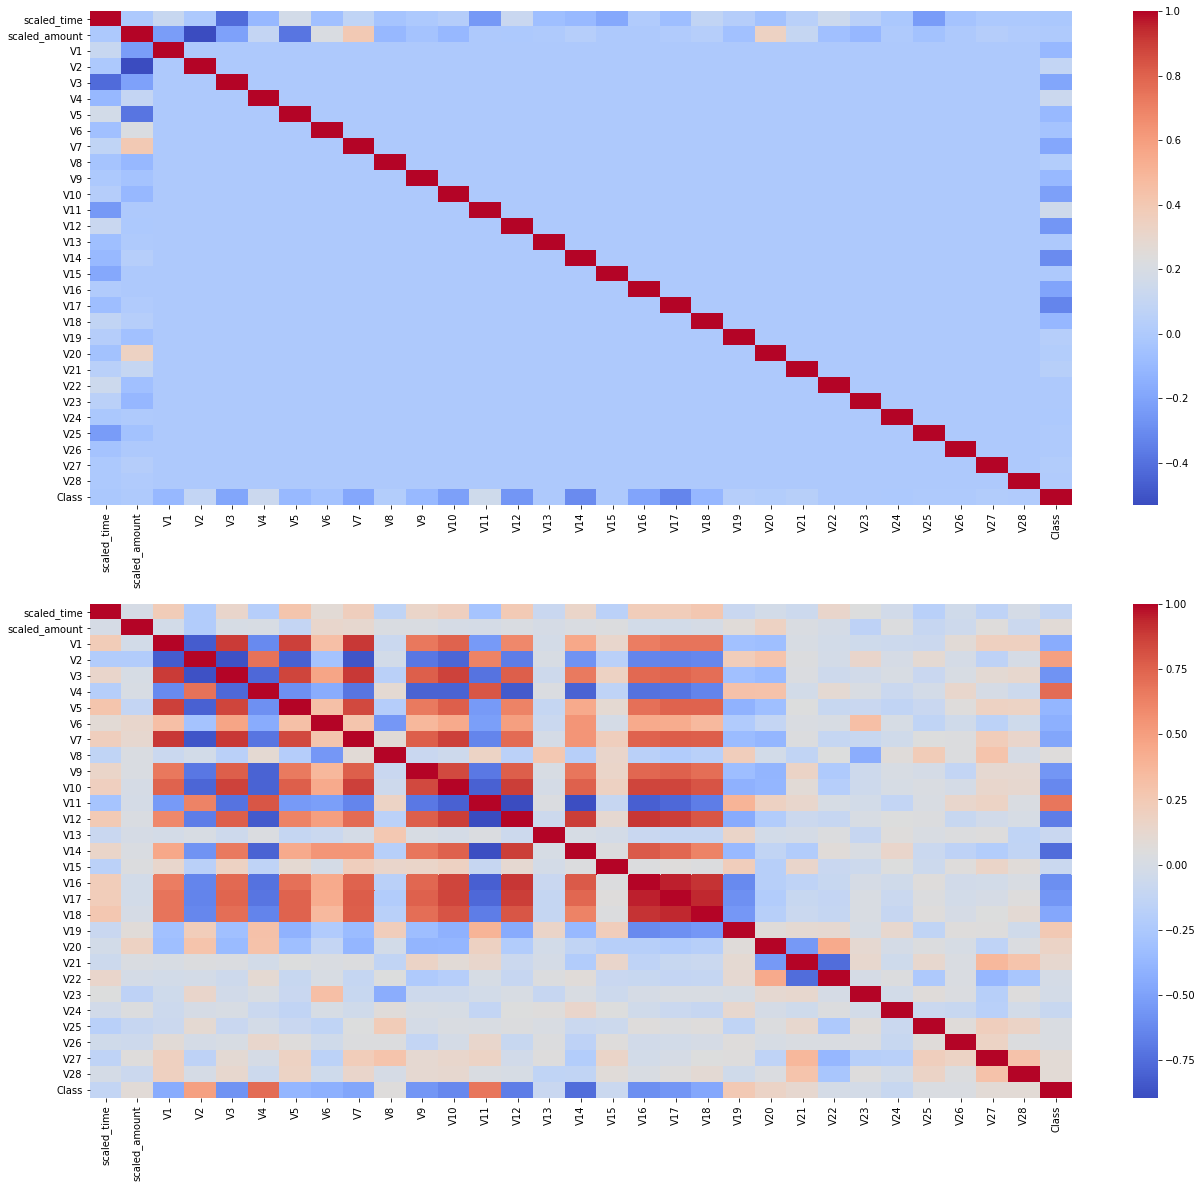

In [ ]:

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(22,20))


corr = df.corr()
sns.heatmap(corr,cmap='coolwarm', annot_kws={'size':20}, ax=ax1)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr,cmap='coolwarm', annot_kws={'size':20}, ax=ax2)

# Considerations

* Highly Negative correlated with class = V19, V11, V4, V2, when those correlations are low, we have better chances to predict fraud.

* Highly Positive correlated with class = V17, V14, V12, V10, when those correlations are high, we have better chances to predict fraud.

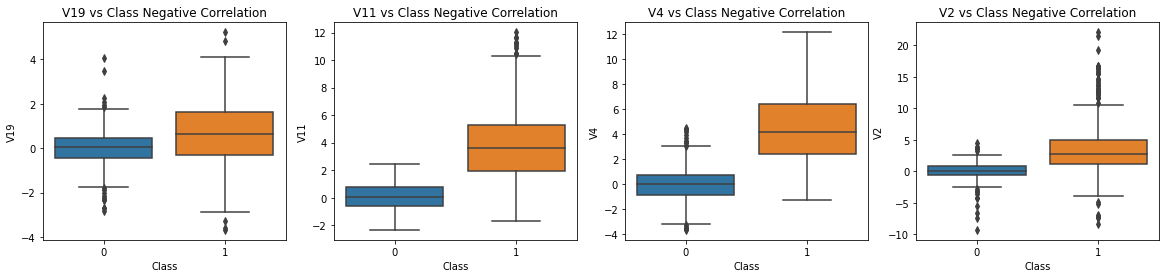

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive Correlations with our Class (The higher our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[0])
axes[0].set_title('V19 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[1])
axes[1].set_title('V11 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[2])
axes[2].set_title('V4 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[3])
axes[3].set_title('V2 vs Class Negative Correlation')

plt.show()

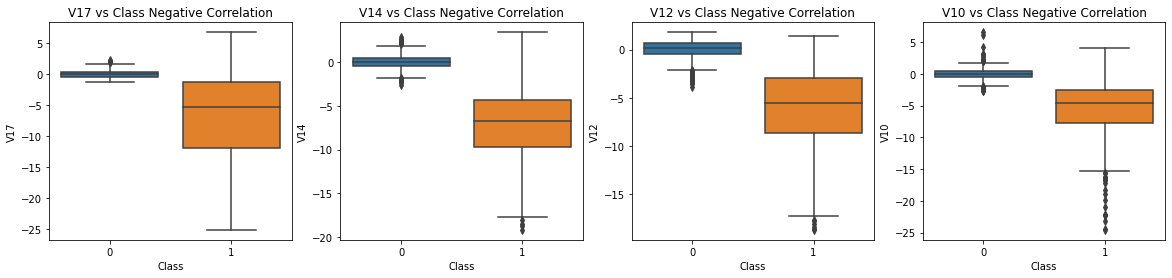

In [ ]:


f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

# Anomaly Detection

***Removing extreme outliers from features high correlated with our class will have a good impact on ours model accuracy.***
* We use Interquartile Range (IQR) to calculate a new threshold of our features that have extreme outliers, we don't remove all outliers because of loss information and risk of underfiting our model.
* Will be used some multiplier with the IQR to improve our threshold range, the lower multiplier used, more outliers will be removed. That was tunned to a better fit.

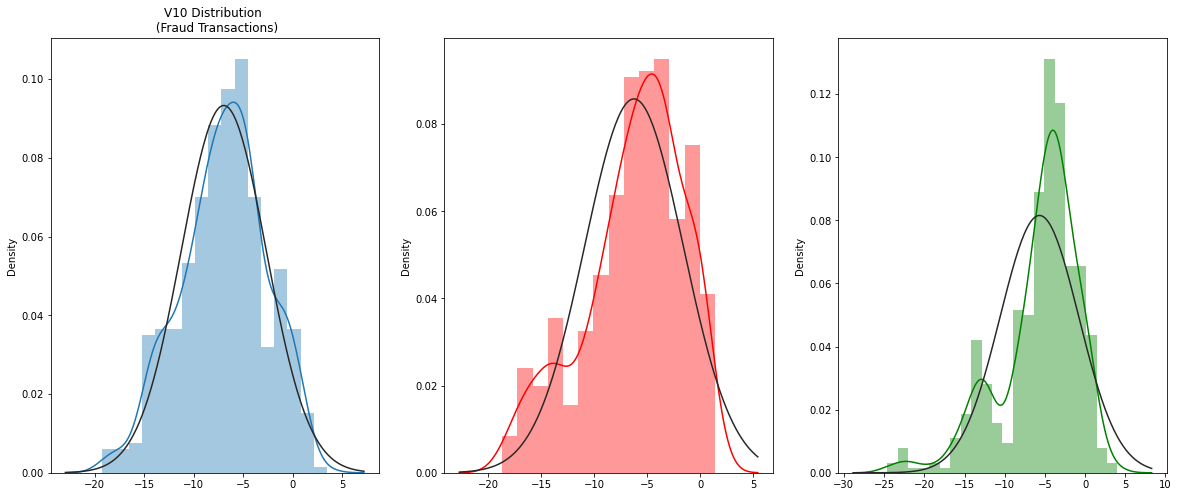

In [ ]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))

v14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm)
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=12)

v12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color='r')
ax1.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=12)

v10_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm, color='g')
ax1.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=12)

plt.show()

In [ ]:
## Removing outliers V14 (Highest Negative correlated with labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

# 1.5 here is the multiplier for exclude outliers
v14_cut_off = v14_iqr * 1.5 
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off 
print('Cut Off:{}'.format(v14_cut_off))
print('V14 Lower:{}'.format(v14_lower))
print('V14 Upper:{}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 25)

## REPEAT PROCESS THROUGH MOST CORRELATED VARIABLES

# V12 Feature
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5 
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off 
print('V12 Lower:{}'.format(v12_lower))
print('V12 Upper:{}'.format(v12_upper))

outliers = [x for x in v14_fraud if x < v12_lower or x > v12_upper]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V12 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 25)

# V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5 
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off 
print('V10 Lower:{}'.format(v10_lower))
print('V10 Upper:{}'.format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off:8.114853173228282
V14 Lower:-17.807576138200666
V14 Upper:3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-18.0499976898594, -18.4937733551053, -19.2143254902614, -18.8220867423816]
----------------------------------------------------------------------------------------------------
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
V12 Lower:-17.3430371579634
V12 Upper:5.776973384895937
Feature V12 Outliers for Fraud Cases: 7
V12 outliers:[-18.0499976898594, -17.7216383537133, -18.4937733551053, -17.4759212828566, -17.6206343516773, -19.2143254902614, -18.8220867423816]
----------------------------------------------------------------------------------------------------
Quartile 25: -7.537184847592775 | Quartile 75: -2.53746481466505
V10 Lower:-15.036764896984362
V10 Upper:4.962115234726538
Feature V10 Outliers for Fraud Cases: 25
V10 outliers:[-16.7460

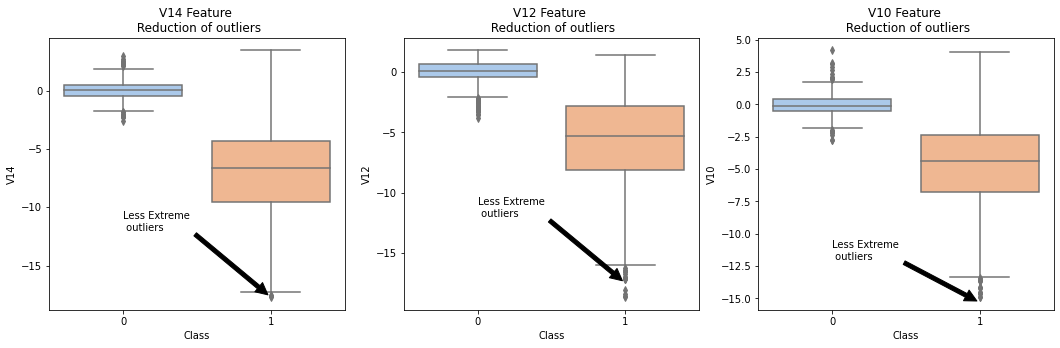

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18,5))

# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df, ax=ax1, palette='pastel')
ax1.set_title("V14 Feature \n Reduction of outliers")
ax1.annotate('Less Extreme \n outliers', xy=(0.98, -17.5), xytext=(0,-12), arrowprops=dict(facecolor='black'))

# Feature V12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette='pastel')
ax2.set_title("V12 Feature \n Reduction of outliers")
ax2.annotate('Less Extreme \n outliers', xy=(0.98, -17.3), xytext=(0,-12), arrowprops=dict(facecolor='black'))

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette='pastel')
ax3.set_title("V10 Feature \n Reduction of outliers")
ax3.annotate("Less Extreme \n outliers", xy=(0.98, -15.2), xytext=(0,-12), arrowprops=dict(facecolor='black'))

plt.show()

# Reducing Dimension and Cluestering
* We use t-SNE to reduce dimension and cluster or data, having small dataset may benefit us from this type of reduction improving accuracy.
* Tryied 3 techniques to reduce dimensionality: t-SNE, PCA and Truncated SVD

In [ ]:

X = new_df.drop('Class', axis=1)
y = new_df['Class']


# t-SNE implementation -- non-linear method
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("t-SNE took: {:.2} s".format(t1-t0))

# PCA Implementation -- linear method
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took: {:.2} s".format(t1-t0))

# Truncated SVD -- linear method
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("TruncatedSVD took: {:.2} s".format(t1-t0))

t-SNE took: 2.3 s
PCA took: 0.035 s
TruncatedSVD took: 0.003 s


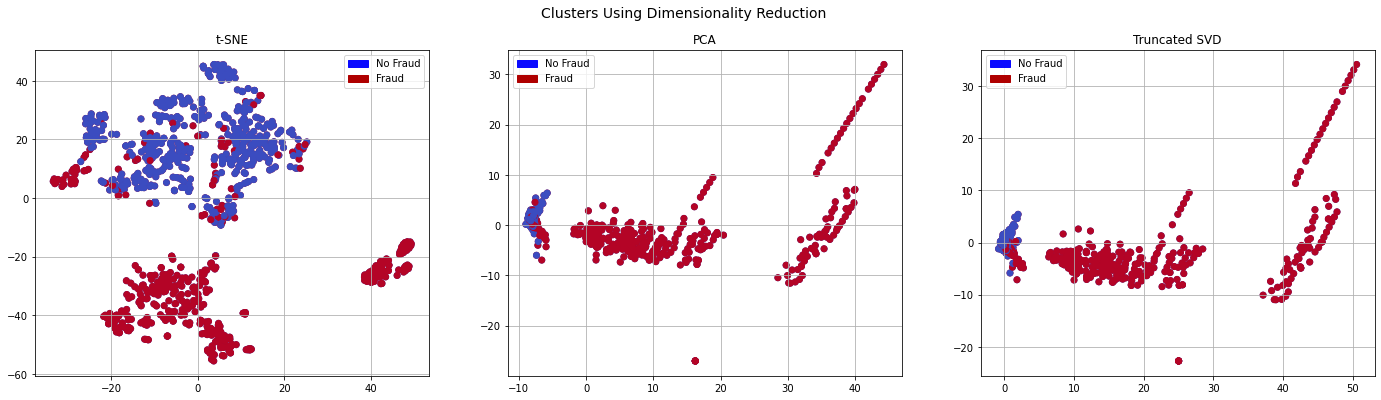

In [ ]:
# seeing the results
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters Using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label=labels[0])
red_patch = mpatches.Patch(color='#AF0000', label=labels[1])


# t-sne
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label=labels[0])
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label=labels[1])
ax1.set_title('t-SNE')
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA 
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label=labels[0])
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label=labels[1])
ax2.set_title('PCA')
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# Truncated SVD
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label=labels[0])
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label=labels[1])
ax3.set_title('Truncated SVD')
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

# Classifiers (UnderSampling)
* In this section we perform 4 types of classifiers models and measure the Receiving Operating Characteristic (ROC), knowing the best model to our data.
* We perform the train-test split on dataset.
* Further more we do a Oversampling to analyse data too.
* GridSearchCV establish the parameters with best predictive scores for those models.

***Undersampling before cross validating (prone to overfit)***

In [ ]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Explicitly used for undersampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# models implementation

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
    
}


In [ ]:
# scores getting higher even when applying Cross Validation
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2)* 100, "%accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 %accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 %accuracy score
Classifiers:  SVC Has a training score of 94.0 %accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 %accuracy score


In [ ]:
## Testing models with random parameters looking for best fitting our model
## Each model recieve distinct types of parameters, this is why a list is passed for each of them. 


# Using GridSearchCV 
from sklearn.model_selection import GridSearchCV

# Logistic Regression parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# Automatically get the best logistic regression with best parameters.
log_reg = grid_log_reg.best_estimator_


# KNearest Neighbors 
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears = grid_knears.best_estimator_


# SVC
svc_params = {"C": [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_


# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree = grid_tree.best_estimator_



In [ ]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.75%
Knears Neighbors Cross Validation Score 94.1%
Support Vector Classifier Cross Validation Score 94.63%
DecisionTree Classifier Cross Validation Score 92.52%


***Undersampling during cross validating***

In [ ]:
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

## Implementing NearMiss 
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

### Cross Validating (the right way)

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
     
    ### smote happen during cross validation not before..
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)  
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [256592 185416 243385 ... 150486 103902  88632] Test: [ 74426   5383 117047 ... 148884  92700 135466]
Train: [ 36337 146524  29040 ... 268903 176893 100864] Test: [213287 213148  81729 ... 234094  39755  38488]
Train: [138964  89467  11083 ...  36736 117673 109158] Test: [ 24808  13805  87582 ...  68316  74758 128352]
Train: [251632 127374 192904 ... 227969 210253 104863] Test: [210774 173390 123300 ... 229238 134220 244407]
Train: [273266 233003  92318 ... 270310  32111 271882] Test: [149513  18074  36915 ... 213230 263965  38948]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [ ]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\rafae\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

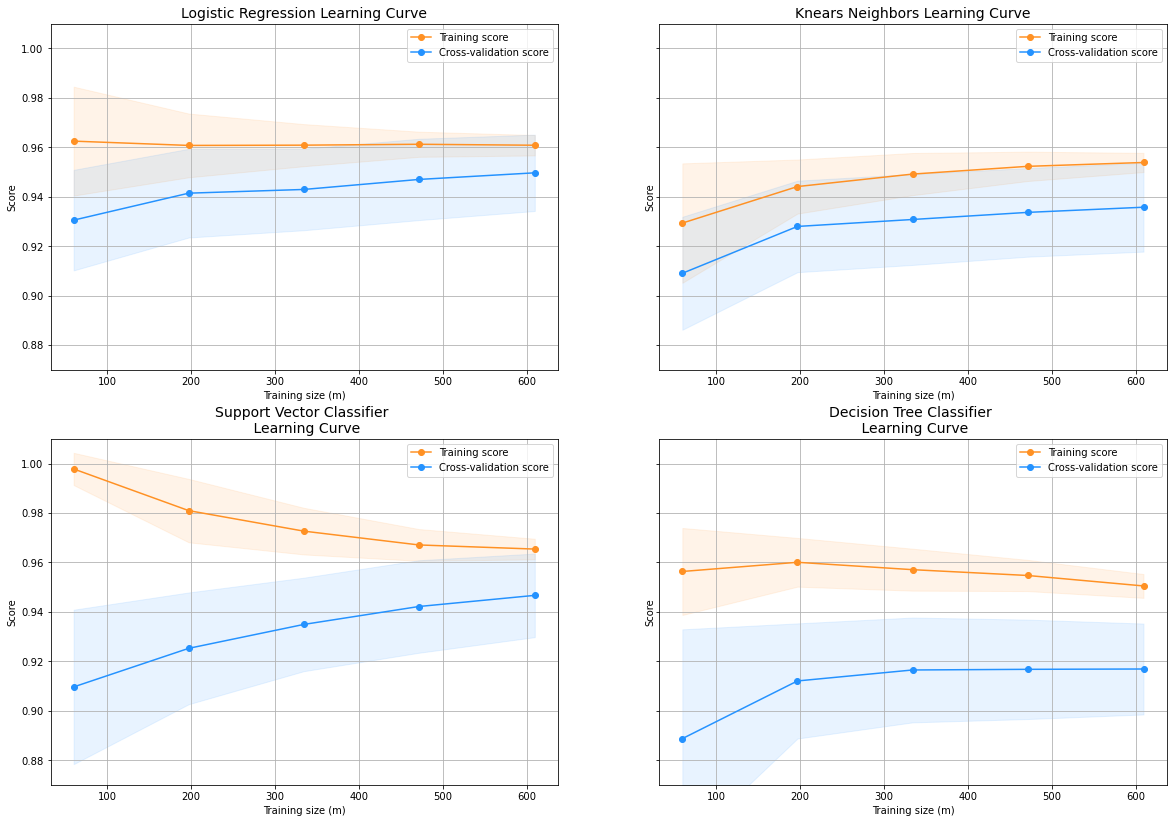

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears, svc, tree, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method='decision_function' )
knears_pred = cross_val_predict(knears, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method='decision_function')
tree_pred = cross_val_predict(tree, X_train, y_train, cv=5)

print('Logistic regression : ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighboor : ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic regression :  0.9803057572560459
KNears Neighboor :  0.9396036326775482
Support Vector Classifier:  0.9779405173186592
Decision Tree Classifier:  0.9235917168331989


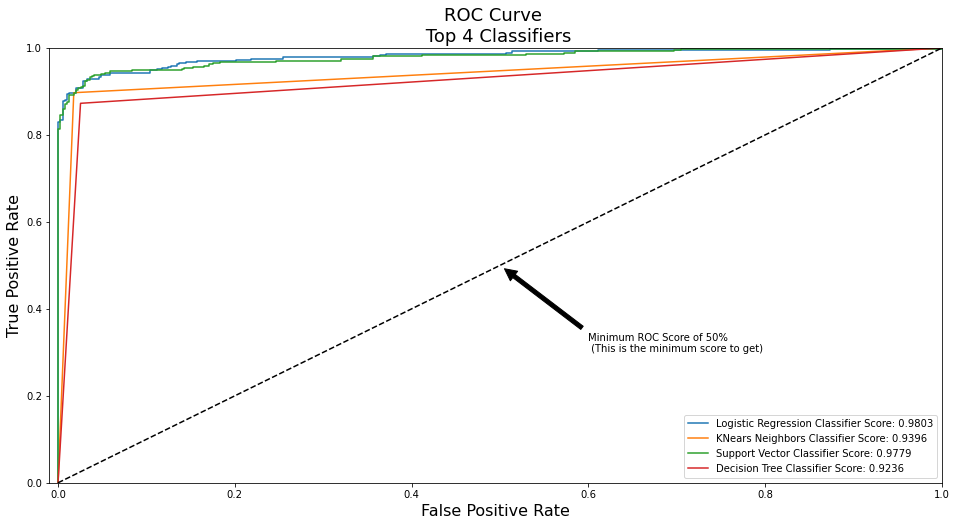

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='black', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

## Terms:

*     **True Positives**: Correctly Classified Fraud Transactions
*     **False Positives**: Incorrectly Classified Fraud Transactions
*     **True Negative**: Correctly Classified Non-Fraud Transactions
*     **False Negative**: Incorrectly Classified Non-Fraud Transactions
*     **Precision**: True Positives/(True Positives + False Positives)
*     **Recall**: True Positives/(True Positives + False Negatives)
*     Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.
*     **Precision/Recall Tradeoff**: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.


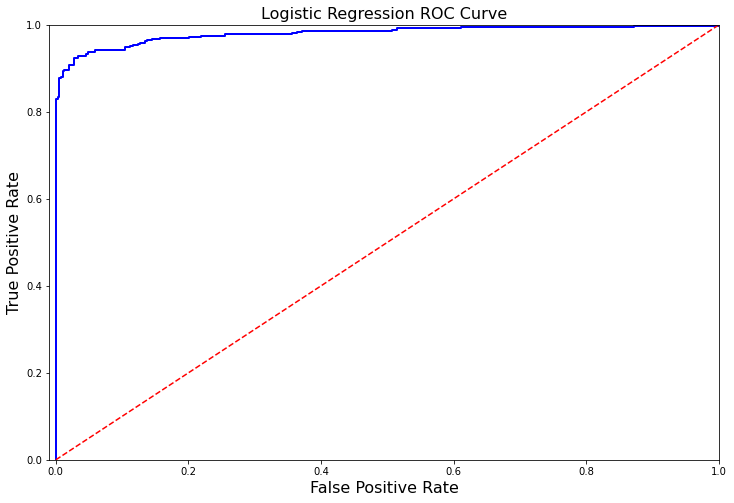

In [ ]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.93
Precision Score: 0.81
F1 Score: 0.87
Accuracy Score: 0.86
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.79
Precision Score: 0.00
Recall Score: 0.25
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


***The results above are overfited, because of the wrong cross validation process*** 

* this can be seen on average precision/recall curve graph.

In [ ]:
### Build oversampling with SMOTE function and using cross validation during the process

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print('Length of X (TRAIN): {} | Length of y (TRAIN): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (TEST): {} | Length of y (TEST): {}'.format(len(original_Xtest), len(original_ytest)))

accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Implementing SMOTE and Cross Validation (right way)
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) ## smote during CV, not before.
    
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (TRAIN): 256326 | Length of y (TRAIN): 256326
Length of X (TEST): 28481 | Length of y (TEST): 28481
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9774821519135489
precision: 0.06372744598471541
recall: 0.8818181818181818
f1: 0.11884076376482107
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     28432
       Fraud       0.07      0.90      0.12        49

    accuracy                           0.98     28481
   macro avg       0.53      0.94      0.56     28481
weighted avg       1.00      0.98      0.99     28481



In [ ]:
y_score = best_est.decision_function(original_Xtest)

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(original_ytest, y_score)

print('Average Precision Score: {0:0.3f}'.format(average_precision))

Average Precision Score: 0.698


Precision-Recall Curve with: AUC = 0.698


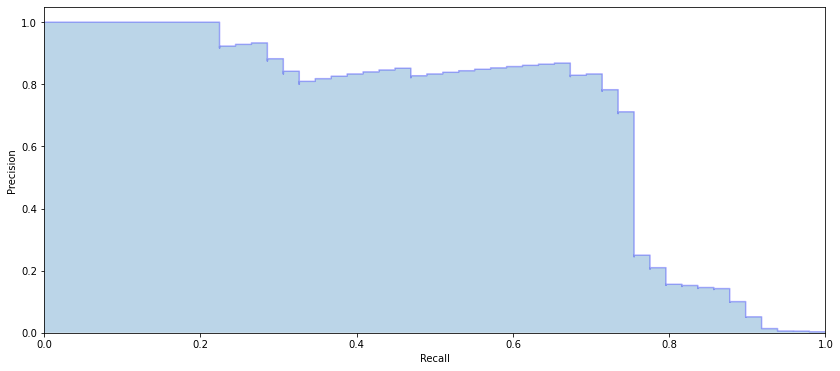

In [ ]:
from sklearn.metrics import precision_recall_curve

fig = plt.figure(figsize=(14,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='b', alpha=0.3, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

print("Precision-Recall Curve with: AUC = {0:0.3f}".format(average_precision))

In [ ]:
# SMOTE after splitting and cross validating
sm = SMOTE(sampling_strategy='minority', random_state=42)

Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [ ]:
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample took :{} sec".format(t1-t0))

Fitting oversample took :3.8130409717559814 sec


# TEST DATA WITH LOGISTIC REGRESSION


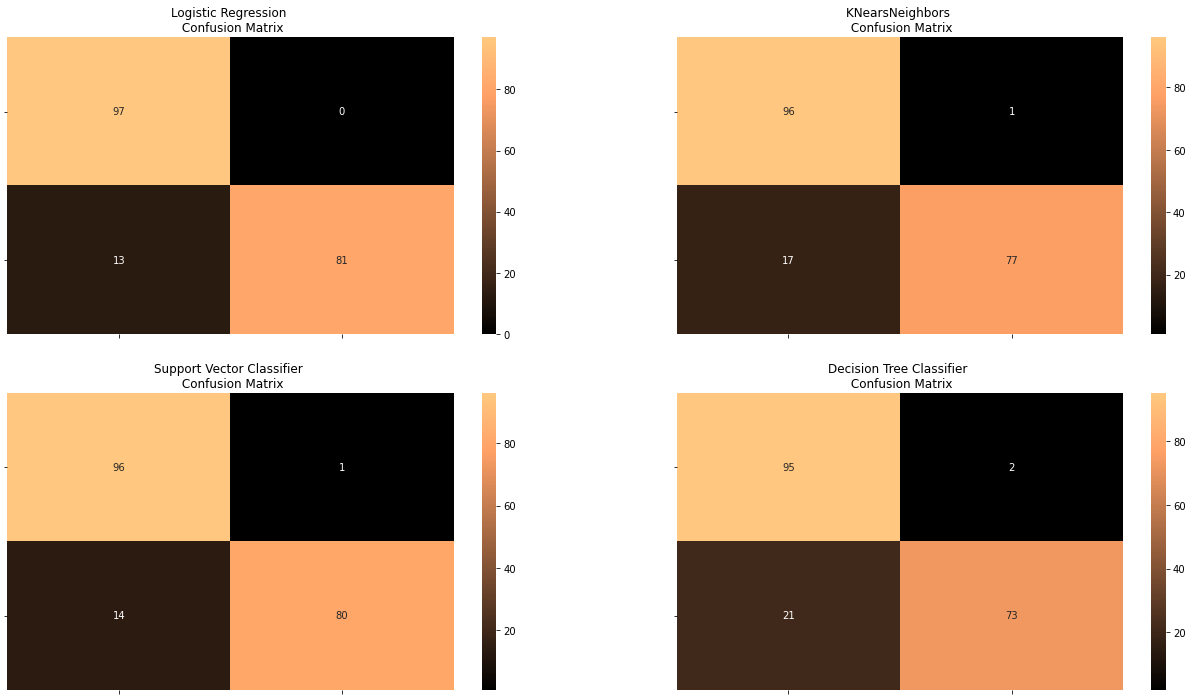

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

#logistic regression with SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

#other models fitted with UnderSampling
y_pred_knear = knears.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2, figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix")
ax[0, 0].set_xticklabels(['', ''], rotation=90)
ax[0, 0].set_yticklabels(["", ""], rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0, 1].set_title("KNearsNeighbors \n Confusion Matrix")
ax[0, 1].set_xticklabels(['', ''], rotation=90)
ax[0, 1].set_yticklabels(["", ""], rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1, 0].set_title("Support Vector Classifier \n Confusion Matrix")
ax[1, 0].set_xticklabels(['', ''], rotation=90)
ax[1, 0].set_yticklabels(["", ""], rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1, 1].set_title("Decision Tree Classifier \n Confusion Matrix")
ax[1, 1].set_xticklabels(['', ''], rotation=90)
ax[1, 1].set_yticklabels(["", ""], rotation=360)

plt.show()

In [ ]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        97
           1       1.00      0.86      0.93        94

    accuracy                           0.93       191
   macro avg       0.94      0.93      0.93       191
weighted avg       0.94      0.93      0.93       191

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91        97
           1       0.99      0.82      0.90        94

    accuracy                           0.91       191
   macro avg       0.92      0.90      0.90       191
weighted avg       0.92      0.91      0.90       191

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        97
           1       0.99      0.85      0.91        94

    accuracy                           0.92       191
   macro avg       0.93      0.92      0.92       191
weighted

In [ ]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


g = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=g)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.931937
1,Oversampling (SMOTE),0.978372


# Building Neural Network with Keras

In [ ]:
import keras
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras import layers
from keras.metrics import categorical_crossentropy


n_inputs = X_train.shape[1]

***FIRST MODEL WILL RECIEVE UNDERSAMPLE***

In [ ]:
undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [ ]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
25/25 - 1s - loss: 0.7511 - accuracy: 0.5452 - val_loss: 0.4473 - val_accuracy: 0.7124 - 539ms/epoch - 22ms/step
Epoch 2/20
25/25 - 0s - loss: 0.3903 - accuracy: 0.8259 - val_loss: 0.3361 - val_accuracy: 0.9020 - 37ms/epoch - 1ms/step
Epoch 3/20
25/25 - 0s - loss: 0.3108 - accuracy: 0.9294 - val_loss: 0.2712 - val_accuracy: 0.9281 - 43ms/epoch - 2ms/step
Epoch 4/20
25/25 - 0s - loss: 0.2552 - accuracy: 0.9327 - val_loss: 0.2293 - val_accuracy: 0.9542 - 41ms/epoch - 2ms/step
Epoch 5/20
25/25 - 0s - loss: 0.2148 - accuracy: 0.9392 - val_loss: 0.1965 - val_accuracy: 0.9542 - 40ms/epoch - 2ms/step
Epoch 6/20
25/25 - 0s - loss: 0.1840 - accuracy: 0.9425 - val_loss: 0.1694 - val_accuracy: 0.9608 - 42ms/epoch - 2ms/step
Epoch 7/20
25/25 - 0s - loss: 0.1623 - accuracy: 0.9458 - val_loss: 0.1497 - val_accuracy: 0.9673 - 45ms/epoch - 2ms/step
Epoch 8/20
25/25 - 0s - loss: 0.1460 - accuracy: 0.9557 - val_loss: 0.1380 - val_accuracy: 0.9673 - 52ms/epoch - 2ms/step
Epoch 9/20
25/25 - 0s 

In [ ]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [ ]:
undersample_fraud_predictions = np.argmax(undersample_predictions, axis=1)

In [ ]:
undersample_fraud_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[27308  1124]
 [    6    43]]
Confusion matrix, without normalization
[[28432     0]
 [    0    49]]


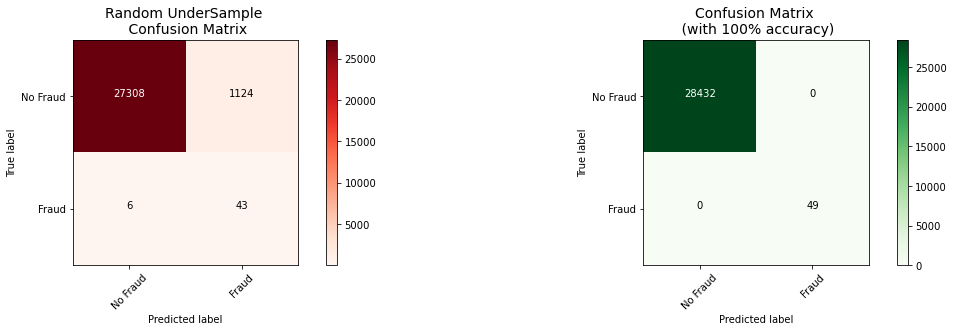

In [ ]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

***SECOND MODEL WILL RECIEVE OVERSAMPLE DATASET(SMOTE):***

In [ ]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1365/1365 - 1s - loss: 0.0748 - accuracy: 0.9710 - val_loss: 0.0301 - val_accuracy: 0.9910 - 1s/epoch - 1ms/step
Epoch 2/20
1365/1365 - 1s - loss: 0.0159 - accuracy: 0.9960 - val_loss: 0.0188 - val_accuracy: 0.9971 - 1s/epoch - 806us/step
Epoch 3/20
1365/1365 - 1s - loss: 0.0083 - accuracy: 0.9982 - val_loss: 0.0071 - val_accuracy: 0.9994 - 1s/epoch - 852us/step
Epoch 4/20
1365/1365 - 1s - loss: 0.0055 - accuracy: 0.9988 - val_loss: 0.0033 - val_accuracy: 0.9999 - 1s/epoch - 824us/step
Epoch 5/20
1365/1365 - 1s - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0053 - val_accuracy: 0.9994 - 1s/epoch - 845us/step
Epoch 6/20
1365/1365 - 1s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0044 - val_accuracy: 0.9994 - 1s/epoch - 803us/step
Epoch 7/20
1365/1365 - 1s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0014 - val_accuracy: 1.0000 - 1s/epoch - 819us/step
Epoch 8/20
1365/1365 - 1s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0036 - val_accuracy: 0.9993 - 1s/epoch - 810us

In [ ]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [ ]:
oversample_fraud_predictions = np.argmax(oversample_predictions, axis=1)

Confusion matrix, without normalization
[[28413    19]
 [   11    38]]
Confusion matrix, without normalization
[[28432     0]
 [    0    49]]


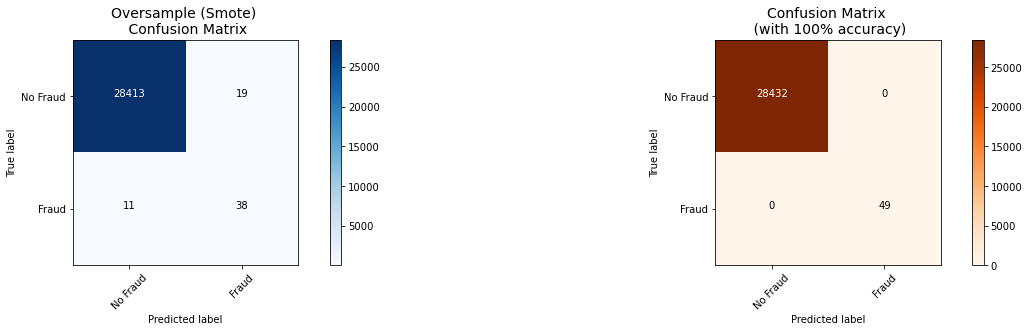

In [ ]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(18,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="Oversample (Smote) \n Confusion Matrix")

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title='Confusion Matrix \n (with 100% accuracy)', cmap=plt.cm.Oranges)


# Conclusion
* In this project we can see that our model Oversampled got more False Positives than with Undersample.
* Some points to remember are that Smote function was used on original dataset without removing outliers that could affect our accuracy.
* We need to consider from a business perspective that False Negatives could be annoying for our clients, implying cards blocked with a normal transactions, this could hurt companny stability with consumers.